https://www.kaggle.com/karangadiya/fifa19  
https://github.com/rolling-scopes-school/ml-intro/tree/2021/2_linear_regression  

In [802]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [864]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

In [804]:
def plot_missing_map(data):
    fig, ax = plt.subplots(figsize=(16,5))
    sns.heatmap(data.isnull(), cbar=False, ax=ax)

def plot_missing_fraction(data):
    null_counts = data.isnull().sum() / len(data)
    plt.figure(figsize=(16,4))
    plt.xticks(np.arange(len(null_counts)), null_counts.index, rotation='vertical')
    plt.ylabel('fraction of rows with missing data')
    plt.bar(np.arange(len(null_counts)), null_counts)

def print_correlation(data):
    corr = data.corr(method='pearson').abs()
    np.fill_diagonal(corr.values, np.nan)
    corr = corr.unstack().sort_values(ascending=False).drop_duplicates()
    print(corr[corr >= 0.9])

def plot_correlation(data):
    plt.figure(figsize=(12,12))
    sns.heatmap(data.corr(method='pearson').abs(), square=True)

def plot_scatter(x, y, data):
    plt.figure(figsize=(5, 5))
    sns.scatterplot(x=x, y=y, data=data)

In [805]:
df = pd.read_csv('data.csv', index_col=0)

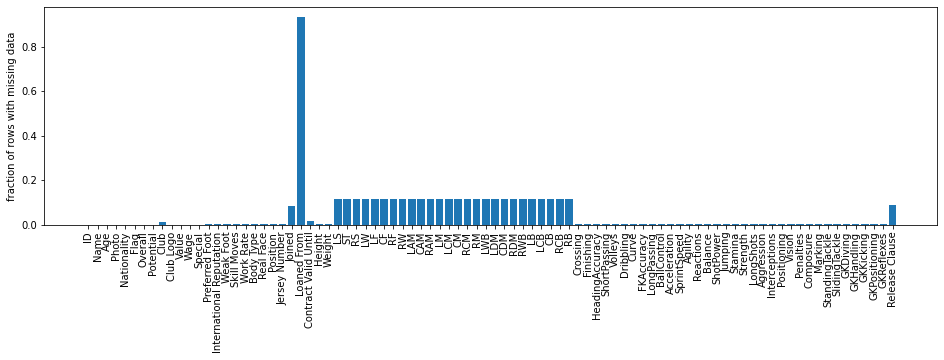

In [806]:
plot_missing_fraction(df)

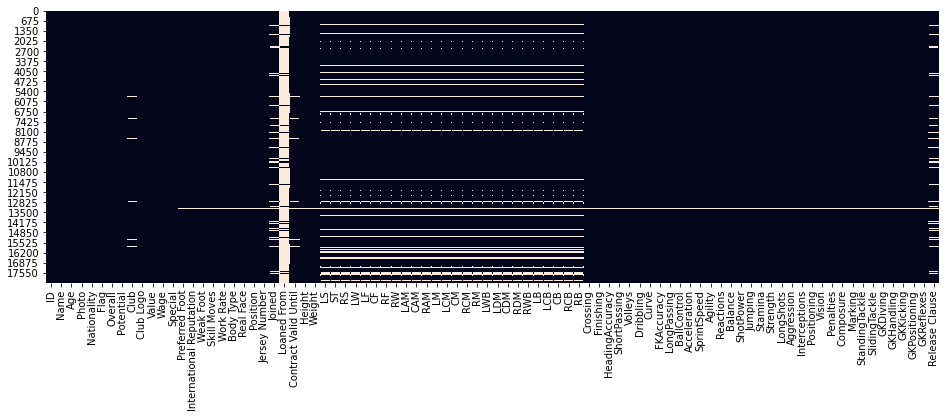

In [807]:
plot_missing_map(df)

In [808]:
# 'Club',

cat = [
    'Nationality',
    'Preferred Foot',
    'Work Rate',
    'Body Type',
    'Position'
]

num = [
    'Value',
    'Age',
    'Overall',
    'Potential',
    'Wage',
    'International Reputation',
    'Weak Foot',
    'Skill Moves',
    'Height',
    'Weight',
    'Crossing',
    'Finishing',
    'HeadingAccuracy',
    'ShortPassing',
    'Volleys',
    'Dribbling',
    'Curve',
    'FKAccuracy',
    'LongPassing',
    'BallControl',
    'Acceleration',
    'SprintSpeed',
    'Agility',
    'Reactions',
    'Balance',
    'ShotPower',
    'Jumping',
    'Stamina',
    'Strength',
    'LongShots',
    'Aggression',
    'Interceptions',
    'Positioning',
    'Vision',
    'Penalties',
    'Composure',
    'Marking',
    'StandingTackle',
    'SlidingTackle',
    'GKDiving',
    'GKHandling',
    'GKKicking',
    'GKPositioning',
    'GKReflexes',
    'Release Clause'
]

df_cut = df[num + cat].copy()

In [809]:
def extract_weight(s):
    return float(s[:-3]) * 0.454

def extract_height(s):
    a = s.split("'")
    if len(a) == 1: a.append(0)
    return (int(a[0]) * 12 + int(a[1])) * 0.0254

def extract_money(s):
    a, b, l = s[1:-1], s[1:], s[-1]
    res = float(a) * {'M':1e6,'K':1e3}[l] if l in ['M','K'] else float(b)
    return res / 1e6

df_cut.loc[:,'Weight'] = df_cut['Weight'].dropna().apply(extract_weight)
df_cut.loc[:,'Height'] = df_cut['Height'].dropna().apply(extract_height)

for c in ['Value','Wage','Release Clause']:
    df_cut.loc[:,c] = df_cut[c].dropna().apply(extract_money)

df_cut.loc[:,cat] = df_cut[cat].fillna(df_cut[cat].mode().iloc[0])
df_cut.loc[:,num] = df_cut[num].fillna(df_cut[num].median())

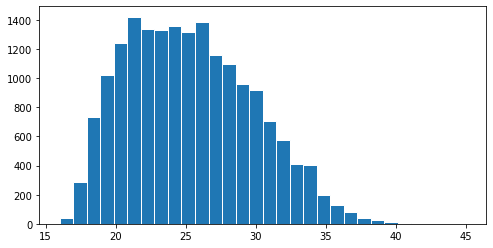

In [810]:
plt.figure(figsize=(8,4))
plt.hist(df['Age'], bins=30, edgecolor='white');

In [811]:
print_correlation(df_cut[num])

StandingTackle  SlidingTackle     0.974664
GKDiving        GKReflexes        0.973327
GKHandling      GKDiving          0.970288
GKReflexes      GKHandling        0.970271
                GKPositioning     0.970138
GKPositioning   GKDiving          0.969872
Release Clause  Value             0.969670
GKPositioning   GKHandling        0.969416
GKReflexes      GKKicking         0.966346
GKDiving        GKKicking         0.965694
GKKicking       GKHandling        0.965248
                GKPositioning     0.964346
StandingTackle  Interceptions     0.941476
BallControl     Dribbling         0.938955
Interceptions   SlidingTackle     0.928295
Acceleration    SprintSpeed       0.921933
ShortPassing    BallControl       0.911462
Marking         StandingTackle    0.906562
dtype: float64


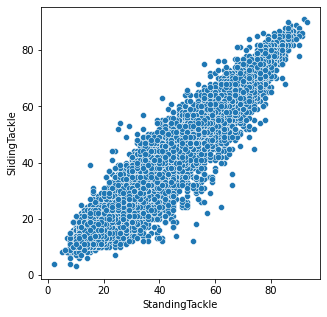

In [812]:
plot_scatter('StandingTackle', 'SlidingTackle', df_cut)

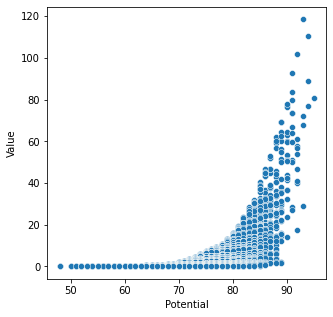

In [813]:
plot_scatter('Potential', 'Value', df_cut)

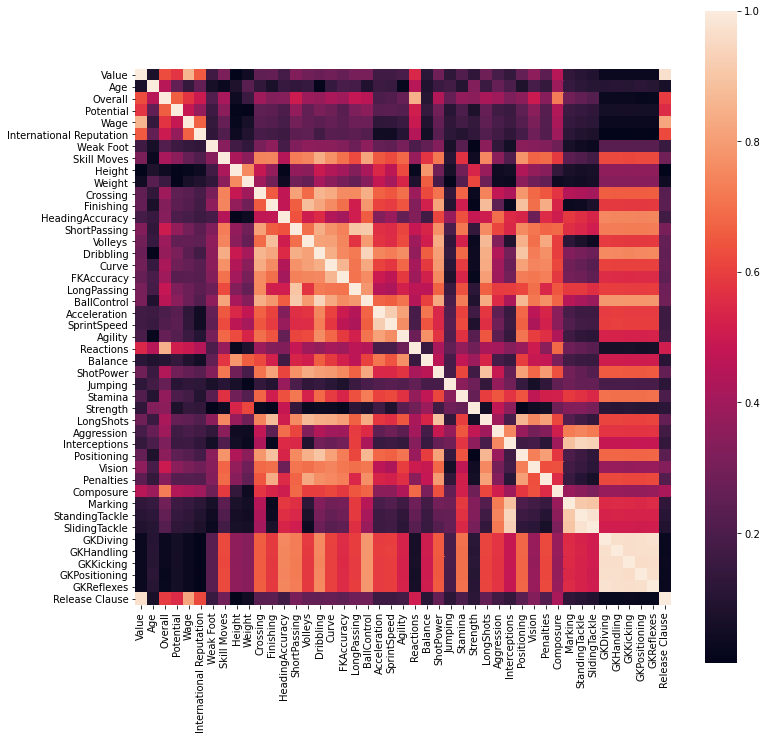

In [814]:
plot_correlation(df_cut[num])

In [815]:
rem = [
    'SlidingTackle',
    'StandingTackle',
    'GKDiving',
    'GKKicking',
    'GKReflexes',
    'GKPositioning',
    'Release Clause',
    'Dribbling',
    'SprintSpeed',
    'ShortPassing'
]

df_cut = df_cut.drop(columns=rem)
for c in rem: num.remove(c)

In [816]:
print_correlation(df_cut[num])

Series([], dtype: float64)


In [817]:
X, y = df_cut.drop('Value', axis=1), df_cut['Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14565, 39), (14565,), (3642, 39), (3642,))

In [781]:
# len(df_cut['Club'].unique())

In [874]:
m = RandomForestRegressor(max_depth=5)

In [877]:
categorical_features = cat
numeric_features = list(set(num) - set(['Value']))

m.fit(X_train[numeric_features], y_train);

In [879]:
mean_squared_error(y_train, m.predict(X_train[numeric_features]))

0.8119682332779671

In [880]:
mean_squared_error(y_test, m.predict(X_test[numeric_features]))

1.541292397821121

In [860]:
categorical_features = cat
numeric_features = list(set(num) - set(['Value']))

transformers = [
    ('sca', StandardScaler(), numeric_features),
    ('pol', PolynomialFeatures(degree=2), numeric_features),
    ('hot', OneHotEncoder(handle_unknown='ignore'), categorical_features)]

preprocessor = ColumnTransformer(transformers)
regressor = Ridge(alpha=0.5)

m = Pipeline(steps=[('pre', preprocessor), ('reg', regressor)])

In [861]:
m.fit(X_train, y_train);

In [862]:
mean_squared_error(y_train, m.predict(X_train))

1.0127420309525357

In [863]:
mean_squared_error(y_test, m.predict(X_test))

1.4756035324410595

In [792]:
lr['reg'].coef_.shape

(867,)

In [793]:
X.columns.values.shape

(39,)

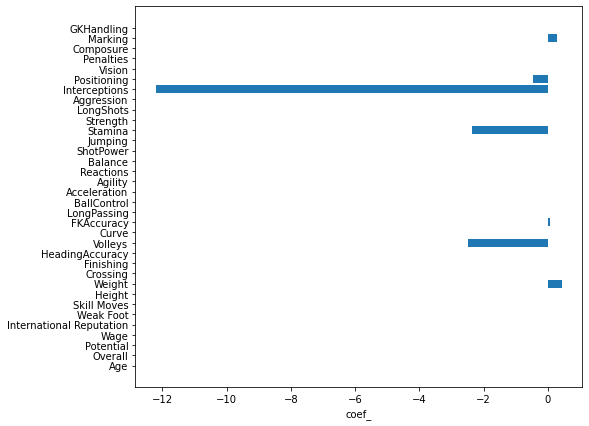

In [796]:
plt.figure(figsize=(8,7))
plt.barh(X.columns.values[:34], lr['reg'].coef_[:34])
plt.xlabel('coef_');

In [795]:
y_test.values, lr.predict(X_test)

(array([2.5  , 0.775, 0.875, ..., 0.35 , 0.11 , 0.575]),
 array([ 2.49176649,  0.67513139,  0.76200281, ..., -0.00425325,
        -0.39729758,  0.31524415]))

In [568]:
# cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=3).mean()

In [620]:
# scaler = StandardScaler()
# X_train[:, :34] = scaler.fit_transform(X_train[:, :34])
# X_test[:, :34] = scaler.transform(X_test[:, :34])

In [619]:
# onehot = OneHotEncoder(handle_unknown = 'ignore')
# X_train_onehot = onehot.fit_transform(X_train[:, 34:])
# X_test_onehot = onehot.transform(X_test[:, 34:])
# X_train_onehot.shape, X_test_onehot.shape

In [ ]:
# learning_curve(lr, X, y)

In [693]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

<module 'matplotlib.pyplot' from '/home/vaaliferov/.local/lib/python3.9/site-packages/matplotlib/pyplot.py'>

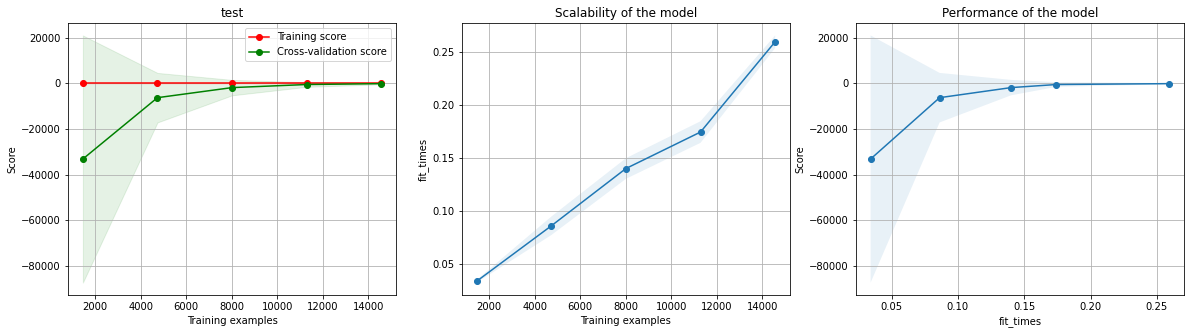

In [708]:
plot_learning_curve(lr, 'test', X, y)